**Цель проекта** 
   - выявить наиболее приоритетную гипотезу по увеличению выручку, на основании которой будет проведен A/B-тест
   - на основании результатов A/B-теста выяснить, приносит ли стратегия, предлагаемая выбранной гипотезой, увеличение выручки интернет-магазина

# 1. Данные

In [19]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

In [23]:
# датафрейм с гипотезами по увеличению выручки
try:
    hypothesis = pd.read_csv('C:\\Users\\User\\Downloads\\Yandex_projects\\hypothesis.csv', sep=';')
    display(hypothesis.head())
    print('\033[1m' + 'Общая информация' + '\033[0m')
    display(hypothesis.info())
except FileNotFoundError:
    print("Файл не найден")

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

In [24]:
# датафрейм с информацией о заказах
try:
    orders = pd.read_csv('C:\\Users\\User\\Downloads\\Yandex_projects\\orders.csv')
    display(orders.head())
    print('\033[1m' + 'Общая информация' + '\033[0m')
    display(orders.info())
except FileNotFoundError:
    print("Файл не найден")

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

In [25]:
# датафрейм с информацией о количестве пользователей в указанную дату в указанной группе A/B-теста
try:
    visitors = pd.read_csv('C:\\Users\\User\\Downloads\\Yandex_projects\\visitors.csv')
    display(visitors.head())
    print('\033[1m' + 'Общая информация' + '\033[0m')
    display(visitors.info())
except FileNotFoundError:
    print("Файл не найден")

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

# 2. Подготовка данных к анализу

In [26]:
# функция для расчет количества пропусков и дубликатов в передавемом датафрейме
def data_prep(data):
    print('\033[1m' + 'Количество пропусков:' + '\033[0m') 
    print(data.isna().sum())
    print()
    print('\033[1m' + 'Количество дубликатов:' + '\033[0m' , data.duplicated().sum())
    print()
    print('\033[1m' + 'Измененный датафрейм:' + '\033[0m') 
    print(data.info())
    return data

In [27]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts'] # переименование столбцов датафрейма hypothesis
data_prep(hypothesis) # вызов функции data_prep к датафрейму hypothesis

Количество пропусков:
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

Количество дубликатов: 0

Измененный датафрейм:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [28]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = pd.to_datetime(orders['date'])
data_prep(orders.head())

Количество пропусков:
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Количество дубликатов: 0

Измененный датафрейм:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  5 non-null      int64         
 1   visitor_id      5 non-null      int64         
 2   date            5 non-null      datetime64[ns]
 3   revenue         5 non-null      int64         
 4   group           5 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 328.0+ bytes
None


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [29]:
visitors['date'] = pd.to_datetime(visitors['date'])
data_prep(visitors.head())

Количество пропусков:
date        0
group       0
visitors    0
dtype: int64

Количество дубликатов: 0

Измененный датафрейм:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      5 non-null      datetime64[ns]
 1   group     5 non-null      object        
 2   visitors  5 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 248.0+ bytes
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Столбцы датафремов hypothesis (первая буква названия была заменена с заглавной на строчную) и orders (слова в названии были разделены нижним подчеркиванием) были переименованы. 

В датафреймах orders и visitors столбцы с информацией о дате, 'date', были переведены из строкового типа в формат даты.

Ни в одном из датафремов hypothesis, orders и visits не было обнаружено пропусков и дубликатов.

In [30]:
# получение id пользователей, которые вошли и в группу А, и в группу В
group_a = orders.query('group == "A"') # пользователи, вошедшие в группу А
group_b = orders.query('group == "B"') # пользователи, вошедшие в группу В
a_id = group_a['visitor_id'].to_list() # список id пользователей из группы А
b_id = group_b['visitor_id'].to_list() # список id пользователей из группы В
ab_id = [] # список, в который будут добавляться пользователи, вошедшие в обе группы
for i in a_id: # для каждого id в группе А
    if i in b_id: # если пользователь также находится в группе В
        ab_id.append(i) # добавить его в список пользователей, вошедших в обе группы
print(ab_id)
print(len(ab_id))

[4069496402, 199603092, 3803269165, 2378935119, 237748145, 4256040402, 2038680547, 2378935119, 1738359350, 2458001652, 199603092, 3891541246, 2378935119, 4256040402, 2716752286, 3656415546, 2686716486, 2954449915, 2038680547, 2927087541, 3234906277, 4256040402, 457167155, 2579882178, 3957174400, 1648269707, 2780786433, 818047933, 2044997962, 1959144690, 2038680547, 3202540741, 1333886533, 351125977, 2458001652, 3951559397, 393266494, 3984495233, 2780786433, 2038680547, 4256040402, 237748145, 2038680547, 3891541246, 2458001652, 4120364173, 4266935830, 1230306981, 1230306981, 1294878855, 1614305549, 3984495233, 8300375, 237748145, 2458001652, 477780734, 1230306981, 1614305549, 1668030113, 3717692402, 199603092, 3766097110, 3941795274, 471551937, 1316129916, 1801183820, 4256040402, 1602967004, 2587333274, 2600415354, 232979603, 1294878855, 4256040402, 2378935119, 3972127743, 1404934699, 2458001652, 4256040402, 276558944, 237748145, 3062433592, 199603092, 2654030115, 3963646447, 4186807279

In [31]:
# удаление пользователей, вошедших в обе группы из списка orders
orders = orders.query('visitor_id not in @ab_id')
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


# 3. Приоритизация гипотез

Сначала гипотезы будут приоритизированы с помощью фреймворка ICE, где 

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [32]:
# приоритизация гипотез с помощаью фреймворка ICE
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])\
                    .astype('int') # расчет индека ice и приведение его значений к типу int
arg = max([len(i) for i in hypothesis['hypothesis']]) + 1 # максимальная длина содержимого ячейки столбца 'hypothesis'
pd.set_option('display.max_colwidth', arg) # отображаемая ширина столбца 'hypothesis' равна длине самой динной ячейки в этом столбце
hypothesis.sort_values(by='ice', ascending=False).reset_index().drop(columns='index')

,hypothesis,reach,impact,confidence,efforts,ice
0,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2
6,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1
7,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1
8,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1


На основе фреймворка ICE можно судить о том, что самыми приоритетными гипотезами являются:
   - "Запустить акцию, дающую скидку на товар в день рождения"
   - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
   - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

Затем гипотезы будут приоритизированы с помощью фреймворка RICE, где

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [33]:
# приоритизация гипотез с помощаью фреймворка RICE
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])\
                     .astype('int') # расчет индека rice и приведение его значений к типу int
pd.set_option('display.max_colwidth', arg)
hypothesis.sort_values(by=['rice', 'ice'], ascending=False).reset_index().drop(columns='index')

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
4,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,9
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1,4
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


На основе фреймворка RICE можно судить о том, что самыми приоритетными гипотезами являются:
   - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
   - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
   - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

Приоритет гипотез различается в зависимости от того, расчитывался ли ICE или RICE. Так произошло потому, что RICE в отличие от ICE учитывает количество пользователей, которое затронет предлагаемое изменение. Следовательно, даже гипотезы с высоким ICE могут иметь небольшой охват пользователей, из-за чего их RICE будет невысоким.

Однако, независимо от того, расчитывался ли ICE или RICE, в топ-3 самых приоритетных гипотез входят добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок и добавление двух новых каналов привлечения трафика, что позволит привлекать на 30% больше пользователей.

Так как гипотеза о "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" является гипотезой с набольшим охватом пользователей, а также она имеет достаточно высокий ICE, то данная гипотеза будет протестирована в А/В-тесте.

# 4. Анализ А/В-теста

### График кумулятивной выручки по группам

In [34]:
# уникальные значения пар и групп тестов
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [35]:
# агрегированные кумулятивные данные по дням о заказах:
# для каждой группы считается сумма заказов, количества покупателей и выручки с начала теста по дату, указанную в столбце 'date'
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date']<=x['date'], orders['group']==x['group'])]\
    .agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis=1)\
    .sort_values(by=['date', 'group'])\
    .rename(columns={'transaction_id':'orders', 'visitor_id':'buyers'})
orders_aggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [36]:
# агрегированные кумулятивные данные по дням о посетителях
# для каждой группы теста считается сумма посетителей с начала теста по дату, указанную в столбце 'date'
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)\
    .sort_values(by=['date','group'])
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [37]:
# таблица, объединяющая агрегированные кумулятивные данные о посетителях и о заказах
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date','group'], right_on=['date','group'])
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [38]:
# кумулятивные данные по датам о выручке и количеству заказов для пользователей из группы А
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
# кумулятивные данные по датам о выручке и количеству заказов для пользователей из группы В
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

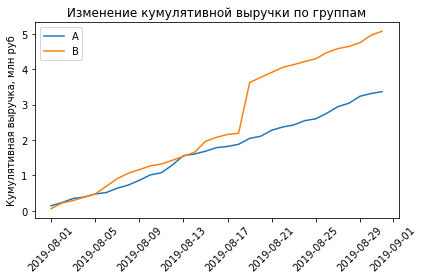

In [39]:
warnings.filterwarnings("ignore")
# график изменения кумулятивной выручки в группе А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/10**6, label='A')
# график изменения кумулятивной выручки в группе В
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/10**6, label='B')
plt.xticks(rotation=45) # поворот подписей оси х на 45 градусов
plt.legend() # показ легенды
plt.ylabel('Кумулятивная выручка, млн руб') # подпись оси у
plt.title('Изменение кумулятивной выручки по группам') # название графика
plt.tight_layout() # подбор ширины диаграммы так, чтобы подписи не пересекались

**Вывод**

Группа В стабильно имеет более высокую кумулятивную выручку по сравнению с группой А, начиная с 13 августа. Однако, в то время как график на группы А растет приактически равномерно, график для группы В показывает резкий скачок выручки примерно в полтора раза (с примерно 2.5 до 4 млн руб) в период с 18 по 19 августа. Причиной этого скачка может служить либо всплеск числа заказов в этот период, либо о появлении аномально дорогих заказов.

### График кумулятивного среднего чека по группам

Text(0.5, 1.0, 'Изменение кумулятивного среднего чека по группам')

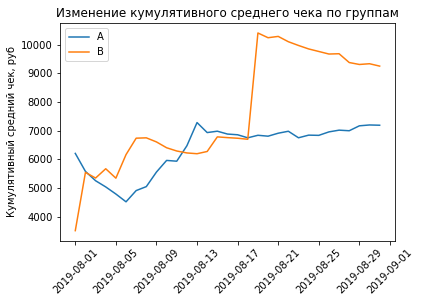

In [40]:
# график изменения кумулятивного среднего чека в группе А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
# график изменения кумулятивного среднего чека в группе В
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Кумулятивный средний чек, руб')
plt.title('Изменение кумулятивного среднего чека по группам')

**Вывод**

На графике изменения кумулятивного среднего чека по группам виден резкий скачок среднего чека в сторону увеличения в примерно 1.5 раза (с 7 до 10 тысяч рублей) для группы В 18 августа. После скачка размер среднего чека у группы В начал постепенно снижаться и в конце теста снизился примерно на 10% по сравнению со своим максимальным значением, достигнув 9 тысяч рублей. Такой скачок может быть обусловлен совершением очень крупного заказа 18 августа.

В группе А также отмечаются несколько скачков среднего чека вверх в период с 5 по 12 августа, то есть в начале теста, затем средней чек в этой группе установился на уровне примерно в 7 тысяч рублей.

Возможно, что из-за всплекса на графике, для группы В потребуется больше данных, чтобы эта группа согла прийти к значениям реального среднего чека и установиться его уровне.

### График относительного изменения кумулятивного среднего чека группы В к группе А

In [41]:
# датафрейм с выручкой и количеством заказов по группе А, объединенный с датафреймом с выручкой и группой заказов в группе В
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b,
                                                       left_on='date', 
                                                       right_on='date', 
                                                       how='left', 
                                                       suffixes=['_a', '_b'])
merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего чека в группе В к группе А')

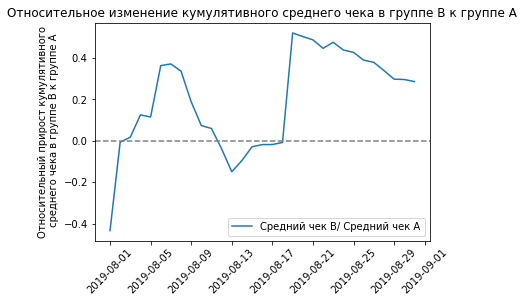

In [42]:
# график отношения средних чеков в группе В к группе А
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a']) - 1,
        label='Средний чек В/ Средний чек А')
# добавление горизонтальной пунктирной линии на уровне нуля, обозначающей отсутствие разницы между группами А и В
plt.axhline(y=0, linestyle='--', color='grey')
plt.xticks(rotation=45)
plt.ylabel('Относительный прирост кумулятивного\n среднего чека в группе В к группе А')
plt.legend()
plt.title('Относительное изменение кумулятивного среднего чека в группе В к группе А')

**Вывод**

Кумулятивный средний чек для группы В стал выше аналогичного показателя для группы А уже на второй день с начала теста и рос рост по отношению к кумулятивному среднему чеку для группы А до 8 августа (рост показателя с -0.2 до 0.35). Затем показатель падал с 8 по 13 августа, упав до значения приблизительно в -0.13. С 13 августа отношение кумулятивного среднего чека в группе В к группе А начало расти, и с 15 августа кумулятивной средний чек группы В стал стабильно выше аналогичного показателя для группы А. На конец теста отношение кумулятивного среднего чека в группе В к группе А составляет 0.25, то есть кумулятивный средний чек в группе В на 25% аналогичного показателя в группе А.

Как и на предыдущих графиках, в период с 18 на 19 августа виден резкий скачок величины кумулятивного среднего чека в группе В (скачок показателя от примерно 0.02 до 0.5, то есть в 25 раз), который может быть обусловлен аномально большим заказом, сделанным в этот день.

График также показывает то, что начиная с 19 августа отношение кумулятивного среднего чека в группе В начинает уменьшаться по отношение к аналогичному показателю в группе А.

### График кумулятивной конверсии по группам

In [43]:
# добавление столбца с расчетом конверсии в датафрейм cumulative_data
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
# датафрейм с данными о конверсии для группы А
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
# датафрейм с данными о конверсии для группы В
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

Text(0.5, 1.0, 'Изменение кумулятивной конверсии по группам')

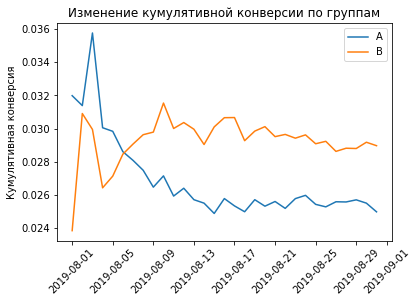

In [44]:
# построение графика кумулятивной конваерсии по группам
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()
plt.ylabel('Кумулятивная конверсия')
plt.title('Изменение кумулятивной конверсии по группам')

**Вывод**

На графике изменения кумулятивной конверсии по группам видно, что в группе А кумулятивная конверсия претерпела скачок в начале теста (показатель вырос с 0.0295 до примерно 0.0347), после которого следовало падение конверсии до ее уровня чуть выше того, что был в первый день теста и стала равной примерно 0.032. Затем кумулятивная  конверсия продолжила расти, и к концу теста установилась в диапазоне от 0.029 до 0.031.

Кумулятивная конверсия группы В также претерпела резкий скачок с последующим падением в начале теста (рост показателя с 0.033 до 0.037). Затем показатель начал расти, достигнув пикового значения 0.036 11 августа. После этой даты кумулятивная конверсия несколько снизилась, установившись к концу теста в диапазоне от 0.033 до 0.034.

В целом, к концу теста кумулятивная конверсия группы В стабильно выше кумулятивной конверсии группы А.

### График относительного изменения кумулятивной конверсии группы В к группе А

In [45]:
# датафрейм с конверсиями для групп А и В, объединенный по дате
merged_cumulative_conversion = cumulative_data_a[['date', 'conversion']].merge(cumulative_data_b[['date', 'conversion']],
                                                                            how='left', 
                                                                            on='date', 
                                                                            suffixes=['_a','_b'])
merged_cumulative_conversion.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


Text(0.5, 1.0, 'График относительного изменения кумулятивной конверсии группы В к группе А')

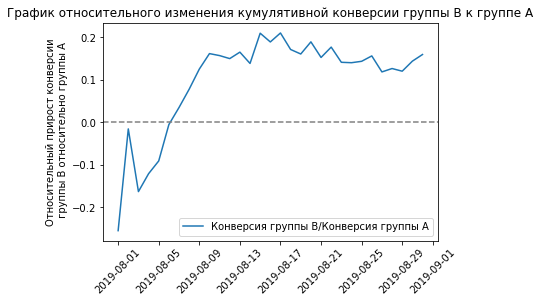

In [46]:
# график относительного изменения кумулятивной конверсии группы В к группе А
plt.plot(merged_cumulative_conversion['date'],
         merged_cumulative_conversion['conversion_b']/merged_cumulative_conversion['conversion_a'] - 1,
        label='Конверсия группы В/Конверсия группы A')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Относительный прирост конверсии\n группы B относительно группы A')
plt.title('График относительного изменения кумулятивной конверсии группы В к группе А')

**Вывод**

В начале эксперимента, 2 августа, отношение кумулятивных конверсий резко растет вверх, достигая значения 0.05, затем опускается до значений ниже, чем -0.05, 3 августа. После чего показатель начинает резко расти, достигая максимального значения в 0.20 15 августа. После 15 августа отношение кумулятивной конверсии в группе В к группе А начинает снижаться, установившись к концу эксперимента в диапазоне от 0.10 до 0.15.

В целом, график относительного изменения кумулятивной конверсии группы В к группе А показывает, что начиная с 6 августа кумулятивная конверсия группы В стабильно выше аналогичного показателя для группы А, а также то, что отношение конверсий к концу эксперимента устанавливается в диапазоне от 0.10 до 0.15. То есть кумулятивная конверсия В у конце теста на 10-15% кумулятивной конверсии группы А.

### График количества заказов по пользователям

In [47]:
# датафрейм orders с информацией о заказах, сгруппированный по id пользователя,
# где для каждого пользователя расчитана сумма заказов и суммарная выручка
orders_by_user = orders.groupby('visitor_id', as_index=False)\
                .agg({'transaction_id':'nunique', 'revenue':'sum'})\
                .rename(columns={'transaction_id':'transaction_count'})
orders_by_user.head()

,visitor_id,transaction_count,revenue
0,5114589,1,570
1,6958315,1,1490
2,11685486,1,6201
3,39475350,1,3990
4,47206413,1,730


Text(0.5, 1.0, 'Количество заказов на одного пользователя')

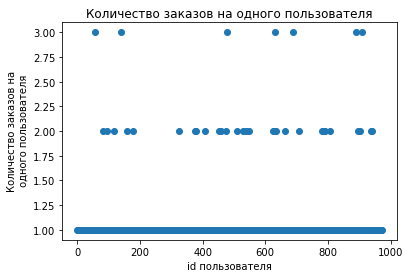

In [48]:
x_values = pd.Series(range(0, len(orders_by_user))) # подписи для оси х, отображающие id пользователя
plt.scatter(x_values, orders_by_user['transaction_count']) # диаграмма рассеивания, показывающая количество заказов на одного пользователя
plt.xlabel('id пользователя')
plt.ylabel('Количество заказов на\n одного пользователя')
plt.title('Количество заказов на одного пользователя')

**Вывод**

На диаграмме количества заказов на одного пользователя видно, что в основном пользователя делают по одному заказу. Также иногда встречаются пользователи, которые делают по 2 заказа. Совсем редко пользователи делают 3 заказа. 

### Определение 95-ого и 99-ого перцентиля количества заказов на пользователя

In [49]:
print(np.percentile(orders_by_user['transaction_count'], [95, 99]))

[1. 2.]


**Вывод**

Не более 5% пользователей оформляли более 1 заказа и не более 1% процента пользователей оформляли более 2 заказов. 

За границу аномально высокого количества заказов будет взять 95-й перцентиль, и, соотвественно, количество заказов больше 1 будет считаться выбросом.

### График стоимостей заказов

Text(0.5, 1.0, 'Выручка, полученная с одного заказа')

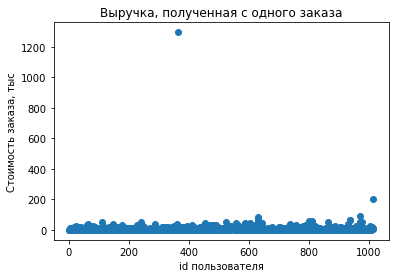

In [50]:
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue']/10**3)
plt.xlabel('id пользователя')
plt.ylabel('Стоимость заказа, тыс')
plt.title('Выручка, полученная с одного заказа')

**Вывод**

Стоимость одного заказа для большинства пользователей меньше 50 тысяч. Однако, есть и очень крупные заказы: примерно на 200 тысяч и на более чем 1.2 млн. 

### 95-й и 99-й перцентили стоимости заказов

In [51]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


**Вывод**

Не более 5% делает заказы на сумму большую 26785 тысяч, не более 1% пользователей делает заказы на сумму большую 53904 рублей.

Стоимость заказа в 26785 рублей (95-й перцентиль) будет считаться границой аномально высокой стоимости заказа. Заказы дороже этой стоимости будут считать выбросами.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [52]:
# количество посетителей из группы А по каждой дате
visitors_per_date_a = visitors.query('group == "A"')[['date', 'visitors']]
# количество посетителей из группы В по каждой дате
visitors_per_date_b = visitors.query('group == "B"')[['date', 'visitors']]

In [53]:
# создание датафреймов orders_by_users_a и orders_by_users_b c информацией о количестве заказов каждого пользователя,
# в группах А и В, соотвественно
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

display(orders_by_users_a.head())
orders_by_users_b.head()

,visitor_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,visitor_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [54]:
# выборка для группы А с числом заказов каждого пользователя, где id пользователей, сделавших хотя бы один заказ, сопоставляется
# количество заказов, а id пользователей, не сделавших ни одного заказа, сопоставляется 0
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_a['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sample_a.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [55]:
sample_a.value_counts()

0    18291
1      427
2       13
3        5
Name: orders, dtype: int64

In [56]:
# выборка для группы В с числом заказов каждого пользователя, где id пользователей, сделавших хотя бы один заказ, сопоставляется
# количество заказов, а id пользователей, не сделавших ни одного заказа, сопоставляется 0
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_b['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sample_b.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [57]:
sample_b.value_counts()

0    18388
1      510
2       16
3        2
Name: orders, dtype: int64

Для оценки статистической значимости в различии конверсий между группам А и В по данным без удаления выбросов будет проведен тест Манна-Уитни, так как значения в выборках распределены не нормально.

Н0: Конверсии в выборках А и В равны

Н1: Конверсии в выборках А и В не равны

За уровень статистической значимости будет взято значение 0.05.

<a class="anchor" id="11-bullet">

In [58]:
# определение статистической значимости различий конверсий между группами А и В 
print('\033[1m' + "p-value:" + '\033[0m' + " {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

# определение относительного прироста конверсии в группе В относительно группы А
print('\033[1m' + "Относительный прирост конверсии группы В к группе А:" + '\033[0m' + " {0:.3f}"\
      .format(sample_b.mean()/sample_a.mean() - 1))

p-value: 0.006
Относительный прирост конверсии группы В к группе А: 0.160


**Вывод**

р-value равен 0.006, что меньше уровня статистической значимости, равного 0.05. На основании этого нулевую гипотезу можно отвергнуть и принять альтернативную гипотезу о том, что в выборках А и В, в которых не удалены выбросы, конверсии неодинаковы. Также, исходя из расчета относительного прироста конверсии группы В к группе А, можно сказать, что группа В имеет на 16.0% более высокую конверсию по сравнению с группой А.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Для определения статистической значимости различий средних чеков в группах А и В будет также использован тест Манна-Уитни.

Н0: Средние чеки в группах А и В равны

Н1: Средние чеки в группах А и В не равны

За уровень статистической значимости будет взято значение 0.05.

In [59]:
# тест Манна-Уитни для определения статистической значимости различий в среднем чеке между группами А и В по неочищенным от 
# выбросов данных
print('\033[1m' + "p-value:" + '\033[0m' + " {0:.3f}".format(
                        stats.mannwhitneyu(
                            orders[orders['group'] == "A"]['revenue'],
                            orders[orders['group'] == "B"]['revenue']
                        )[1]
                )
     )

# относительное различие среднего чека в группе В к группе А
print('\033[1m' + "Относительный прирост конверсии группы В к группе А:" + '\033[0m' + " {0:.3f}"\
      .format(orders[orders['group'] == "B"]['revenue'].mean()/orders[orders['group'] == "A"]['revenue'].mean() - 1))

p-value: 0.415
Относительный прирост конверсии группы В к группе А: 0.287


**Вывод**

p-value равен 0.415, что значительно больше 0.05, поэтому нулевая гипотеза о равенстве средних чеков в выборках А и В не отвергается, несмотря на то, что относительное различие среднего чека в группе В к группе А составляет 28.7%.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [60]:
# пользователи с аномально высокой суммой заказа
abnormal_revenue = orders.query('revenue > 26785')[['visitor_id', 'revenue', 'group']]
display(abnormal_revenue)
print('\033[1m' + 'Количество пользователей с аномально высокой суммой заказа: '+ '\033[0m' + str(len(abnormal_revenue)))

,visitor_id,revenue,group
73,2947100995,29499,A
77,787824685,32350,A
78,3288820196,40740,B
131,2254586615,53904,A
137,1211585711,28490,A
173,2953427180,38160,B
208,3118156181,30649,B
273,2278620397,33970,B
287,2254456485,53904,A
339,834731816,41450,B


Количество пользователей с аномально высокой суммой заказа: 51


In [61]:
# пользователи с аномально высоким количеством заказов в группе А
abnormal_orders_count_a = orders_by_users_a.query('orders > 1')
display(abnormal_orders_count_a)
print('\033[1m' + "Количество пользователей с аномально высоким количеством заказов в группе А: " + '\033[0m' + str(len(abnormal_orders_count_a)))

,visitor_id,orders
36,366673373,2
58,611059232,3
64,678354126,2
72,759473111,2
171,1617417821,2
180,1772171838,2
211,2108163459,3
227,2232111114,2
239,2306096143,2
279,2706377257,2


Количество пользователей с аномально высоким количеством заказов в группе А: 18


In [62]:
# пользователи с аномально высоким количеством заказов в группе В
abnormal_orders_count_b = orders_by_users_b.query('orders > 1')
display(abnormal_orders_count_b)
print('\033[1m' + "Количество пользователей с аномально высоким количеством заказов в группе B: "+ '\033[0m' + str(len(abnormal_orders_count_b)))

,visitor_id,orders
33,249864742,3
51,406208401,2
67,522292794,2
176,1404560065,2
208,1637811943,2
250,1985475298,2
256,2025197455,2
265,2096506107,2
296,2366521417,2
303,2397843657,2


Количество пользователей с аномально высоким количеством заказов в группе B: 18


In [63]:
# список id пользователей с аномальными заказами
abnormal_users = pd.concat([abnormal_revenue['visitor_id'], 
                            abnormal_orders_count_a['visitor_id'], 
                            abnormal_orders_count_b['visitor_id']],
                          axis=0)\
                    .drop_duplicates()\
                    .sort_values()
display(abnormal_users)
print('\033[1m' + "Количество пользователей с аномальной стоимость и/или количеством заказов: " +'\033[0m'+ str(len(abnormal_users)))

568      113298937
1099     148427295
928      204675465
33       249864742
684      358944393
           ...    
940     4003628586
723     4009017467
430     4109358064
743     4133034833
507     4134830387
Name: visitor_id, Length: 86, dtype: int64

Количество пользователей с аномальной стоимость и/или количеством заказов: 86


In [64]:
filtered_a = orders_by_users_a[
    np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
]['orders']
filtered_a.value_counts()

1    406
Name: orders, dtype: int64

In [65]:
# удаление аномальных пользователей из выборок по группам А и В, подготовленным для проведения теста Манна-Уитни:
# объединяются данные пользователей, сделавших не более двух заказов, с данными пользователей, которые не сделали заказов
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_a['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_b['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
warnings.filterwarnings("ignore")
print('\033[1m' + 'Результат фильтрации: ' + '\033[0m')
print(sample_a_filtered.value_counts())
sample_b_filtered.value_counts()

Результат фильтрации: 
0    18291
1      406
Name: orders, dtype: int64


0    18388
1      481
Name: orders, dtype: int64

Для очищенных от выбросов групп А и В будет проведен тест Манна-Уитни для определения статистически значимых различий в конверсии между группами по данным, очищенным от выбросов.

Н0: Конверсии в группах А и В равны

Н1: Конверсии в группах А и В не равны

За уровень статистической значимости будет взято значение 0.05.

In [66]:
print('\033[1m' + 'p-value: ' + '\033[0m' + '{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('\033[1m' + 'Относительный прирост конверсии группы В к группе А:'+ '\033[0m' + ' {0:.3f}'\
      .format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value: 0.008
Относительный прирост конверсии группы В к группе А: 0.174


**Вывод**

Для очищенных от выбросов выборок p-value равно 0.008, что значительно меньше уровня значимости, равного 0.05. Следовательно, нулевая гипотеза о равенстве конверсий в группах А и В отвергается и принимается альтернативная гипотеза о том, что конверсии в группах А и В не равны. 

Прирост конверсии в группе В на 17.4% выше по сравнению с группой А, и это различие является статистически значимым.

In [67]:
# КОД РЕВЬЮВЕРА
aov_a = orders[np.logical_and(
                    orders['group'] == "A",
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]\
    .sort_values(by='date')\
    .groupby('date', as_index=False)\
    .agg({'visitor_id': 'count', 'revenue': 'sum'})\
    .assign(cum_orders=lambda row: row['visitor_id'].cumsum(),
           cum_revenue=lambda row: row['revenue'].cumsum(),
           cum_aov=lambda row: row['revenue'].cumsum() / row['visitor_id'].cumsum())

aov_b = orders[np.logical_and(
                    orders['group'] == "B",
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]\
    .sort_values(by='date')\
    .groupby('date', as_index=False)\
    .agg({'visitor_id': 'count', 'revenue': 'sum'})\
    .assign(cum_orders=lambda row: row['visitor_id'].cumsum(),
           cum_revenue=lambda row: row['revenue'].cumsum(),
           cum_aov=lambda row: row['revenue'].cumsum() / row['visitor_id'].cumsum())

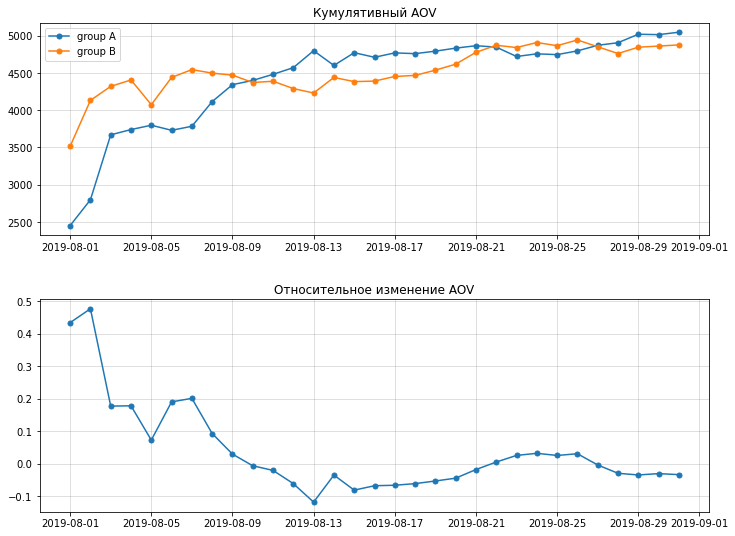

In [68]:
# КОД РЕВЬЮВЕРА
fig, axes = plt.subplots(nrows=2, figsize=(12, 9))
plt.subplots_adjust(hspace=0.3)

# на первой оси строим кум. средние чеки по группам
ax = axes[0]
ax.plot(aov_a['date'], aov_a['cum_aov'], marker='o', ms=5, label='group A')
ax.plot(aov_b['date'], aov_b['cum_aov'], marker='o', ms=5, label='group B')
ax.legend()
ax.set_title("Кумулятивный AOV")
ax.grid(color='grey', alpha=0.5, lw=0.5)

# на второй оси относительное изменение
ax = axes[1]
ax.plot(aov_a['date'], (aov_b['cum_aov'] - aov_a['cum_aov']) / aov_a['cum_aov'], marker='o', ms=5)
ax.set_title("Относительное изменение AOV")
ax.grid(color='grey', alpha=0.5, lw=0.5)

Без аномалий относительное изменение и сами чеки выглядят вполне установивишимися, по крайней мере изменение относительного графика не превышает +-5% за последние 2 недели и уменьшается
<hr style="border: 2px solid green;" />

In [69]:
# КОД РЕВЬЮВЕРА
# фильтрованные данные
sample_a_filtered.value_counts(), sample_b_filtered.value_counts()

(0    18291
 1      406
 Name: orders, dtype: int64,
 0    18388
 1      481
 Name: orders, dtype: int64)

In [70]:
# КОД РЕВЬЮВЕРА
# исходные данные
sample_a.value_counts(), sample_b.value_counts()

(0    18291
 1      427
 2       13
 3        5
 Name: orders, dtype: int64,
 0    18388
 1      510
 2       16
 3        2
 Name: orders, dtype: int64)

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Тест Манна-Уитни будет также использован для определения статистически значимых разлчий между группами А и В по данным, очищенным от выбросов. 

Н0: Стоимости чеков в группах А и В равны

Н1: Стоимости чеков в группах А и В не равны

За уровень статистической значимости будет взято значение 0.05.

In [71]:
# тест Манна-Уитни для определения статистической значимости различий в среднем чеке заказа между группами А и В по 
# данным, очищенным от выбросов
print(
    '\033[1m' + 'p-value: ' + '\033[0m' + '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == "A",
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']
        )[1]
    )

)

# определение отношения среднего чека в группе В к группе А по данным, очищенным от выбросов
print(
    '\033[1m' + 'Относительный прирост конверсии группы В к группе А:'+ '\033[0m' + ' {0:.3f}'.format(
            orders[
                np.logical_and(
                    orders['group'] == "A",
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'].mean()/
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'].mean()
        - 1
    )

)

p-value: 0.364
Относительный прирост конверсии группы В к группе А: 0.035


**Вывод**

Для групп, очищенных от выбросов, p-value равно 0.364, что значительно выше уровня статистической значимости, равного 0.05. Следовательно, нулевая гипотеза о равенстве средних чеков в группах А и В не отвергается. 

Средний чек группы В выше среднего чека А на 3.5%, однако, это различие не является статистически значимым.

### Вывод по результатам A/B-теста

На основании результатов A/B-теста можно сказать, что графики изменения кумулятивного среднего чека по группам и абсолютного и относительного изменения кумулятивной конверсии по группам еще не стабилизировались.

По неочищенным от выбросов данным для групп А и В присутствует статистическая значимость различий в конверсиях групп А и В (p-value = 0.006; средняя конверсия в группе В больше чем в группе А на 16.0%) и отсутствует статистическая значимость в различиях среднего чека в группах А и В (p-value = 0.415; однако, средний чек в группе В больше чем в группе А на 28.7%). 

Затем данные были очищены от выбросов. Выбросами считались пользователи, которые сделали более одного заказа, а также те, у кого стоимость заказа превышала 26785 рублей. По очищенным от выбросов данным удалось выявить статистически значимые различия в конверсии (p-value = 0.008; средняя конверсия группы В больше средней коверсии группы А на 17.4%), но статистически значимых различий в средних чеках между группами А и В выявить не удалось (p=value = 0.364; средний чек в группе В выше среднего чека в группе А на 3.5%). 

Так как метрики изменения кумулятивного среднего чека и кумулятивной конверсии еще не стабилизировались, то тест стоит продолжить до того момента, пока эти метрики не стабилируют свой уровень.